<a href="https://colab.research.google.com/github/huy20146177/baitapAI/blob/main/Social_Network_Ads.csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sas
from sklearn.preprocessing import  StandardScaler as S_scaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR

In [5]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
y = data['Age']
data = data.drop(data.columns[[0]], axis = 1)
data = data.replace("Male",1)
data = data.replace("Female",0)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


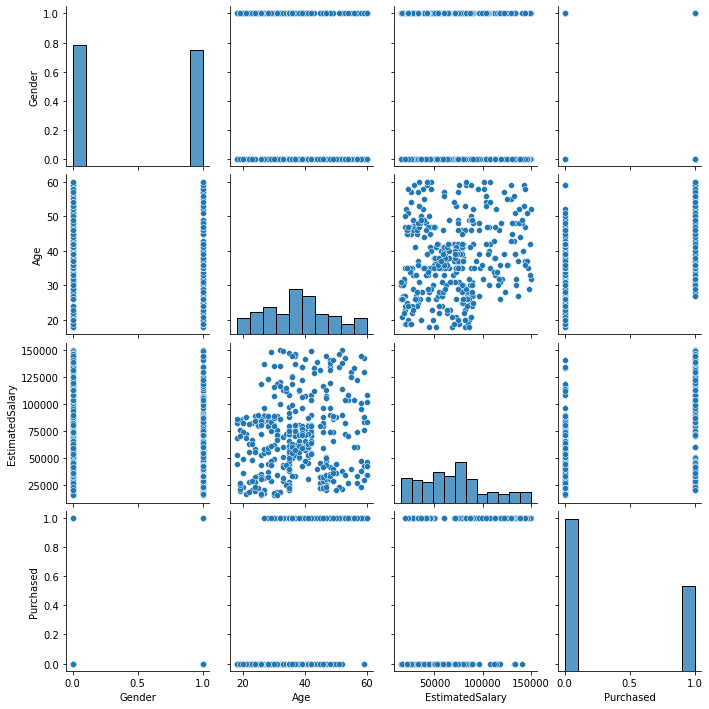

In [7]:
sas.pairplot(data)          #vẽ các mối tương quan giữa các cặp nghiệm 

<Axes: >

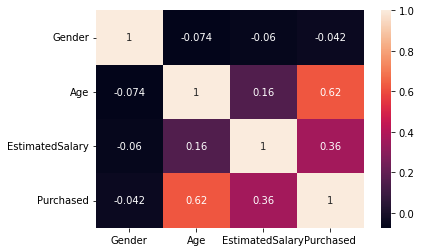

In [8]:
#Biểu đồ nhiệt thể hiện thay thế cho ma trận correlation
corr = data.corr()
sas.heatmap(corr,annot = True)

In [9]:
#Su dung data der train cho AI
x = data.drop(data.columns[[2]], axis = 1)
sc = S_scaler()
x = sc.fit_transform(x)

In [10]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
x_train.shape

(320, 3)

In [11]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
x_test.shape

(80, 3)

In [12]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
y_train.shape

(320,)

In [13]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
y_test.shape

(80,)

In [14]:
#kiem tra lai do chinh xac sau khi train
regression = LR()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test).round(1)

calculation = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original EstimatedSalary','Predicted EstimatedSalary'])
print('Do chinh xac cua train:',regression.score(x_train, y_train))
print('Do chinh xac cua test:',regression.score(x_test, y_test))

Do chinh xac cua train: 1.0
Do chinh xac cua test: 1.0
